<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Goals-&amp;-Methodology-(Felix)" data-toc-modified-id="Goals-&amp;-Methodology-(Felix)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Goals &amp; Methodology (Felix)</a></span></li><li><span><a href="#Data-and-Variable-Explanation-(Alexis)" data-toc-modified-id="Data-and-Variable-Explanation-(Alexis)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data and Variable Explanation (Alexis)</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Reading-&amp;-Cleaning-data-(Alexis:-what-we-did-and-refer-to-cleaning)" data-toc-modified-id="Reading-&amp;-Cleaning-data-(Alexis:-what-we-did-and-refer-to-cleaning)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reading &amp; Cleaning data (Alexis: what we did and refer to cleaning)</a></span></li><li><span><a href="#Variable-Analysis" data-toc-modified-id="Variable-Analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Variable Analysis</a></span><ul class="toc-item"><li><span><a href="#Over-Time-(Felix)" data-toc-modified-id="Over-Time-(Felix)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Over Time (Felix)</a></span><ul class="toc-item"><li><span><a href="#Dwelling-Type" data-toc-modified-id="Dwelling-Type-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Dwelling Type</a></span></li><li><span><a href="#Sales-Number" data-toc-modified-id="Sales-Number-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Sales Number</a></span></li><li><span><a href="#Median-Rent" data-toc-modified-id="Median-Rent-2.2.1.3"><span class="toc-item-num">2.2.1.3&nbsp;&nbsp;</span>Median Rent</a></span></li><li><span><a href="#New-Bonds" data-toc-modified-id="New-Bonds-2.2.1.4"><span class="toc-item-num">2.2.1.4&nbsp;&nbsp;</span>New Bonds</a></span></li><li><span><a href="#Construction-Costs" data-toc-modified-id="Construction-Costs-2.2.1.5"><span class="toc-item-num">2.2.1.5&nbsp;&nbsp;</span>Construction Costs</a></span></li><li><span><a href="#Bond-Yields" data-toc-modified-id="Bond-Yields-2.2.1.6"><span class="toc-item-num">2.2.1.6&nbsp;&nbsp;</span>Bond Yields</a></span></li><li><span><a href="#Interest-Rates" data-toc-modified-id="Interest-Rates-2.2.1.7"><span class="toc-item-num">2.2.1.7&nbsp;&nbsp;</span>Interest Rates</a></span></li></ul></li><li><span><a href="#By-Postcode" data-toc-modified-id="By-Postcode-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>By Postcode</a></span><ul class="toc-item"><li><span><a href="#Median-Rent" data-toc-modified-id="Median-Rent-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Median Rent</a></span></li><li><span><a href="#New-Bonds" data-toc-modified-id="New-Bonds-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>New Bonds</a></span></li><li><span><a href="#Age-Brackets" data-toc-modified-id="Age-Brackets-2.2.2.3"><span class="toc-item-num">2.2.2.3&nbsp;&nbsp;</span>Age Brackets</a></span></li><li><span><a href="#ATSI" data-toc-modified-id="ATSI-2.2.2.4"><span class="toc-item-num">2.2.2.4&nbsp;&nbsp;</span>ATSI</a></span></li><li><span><a href="#High-Income" data-toc-modified-id="High-Income-2.2.2.5"><span class="toc-item-num">2.2.2.5&nbsp;&nbsp;</span>High Income</a></span></li><li><span><a href="#Year-of-Arrival" data-toc-modified-id="Year-of-Arrival-2.2.2.6"><span class="toc-item-num">2.2.2.6&nbsp;&nbsp;</span>Year of Arrival</a></span></li><li><span><a href="#Non-AUS-Citizen" data-toc-modified-id="Non-AUS-Citizen-2.2.2.7"><span class="toc-item-num">2.2.2.7&nbsp;&nbsp;</span>Non-AUS Citizen</a></span></li></ul></li><li><span><a href="#On-Postcode-Level-and-over-Time-(maybe-use-melt?)" data-toc-modified-id="On-Postcode-Level-and-over-Time-(maybe-use-melt?)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>On Postcode Level and over Time (maybe use melt?)</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-Regression-Model-(Chris)" data-toc-modified-id="Baseline-Regression-Model-(Chris)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baseline Regression Model (Chris)</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Improved-Model" data-toc-modified-id="Improved-Model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Improved Model</a></span></li></ul></li><li><span><a href="#Clustering-(Ken-&amp;-Felix)" data-toc-modified-id="Clustering-(Ken-&amp;-Felix)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clustering (Ken &amp; Felix)</a></span><ul class="toc-item"><li><span><a href="#Kmeans" data-toc-modified-id="Kmeans-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Kmeans</a></span></li><li><span><a href="#Hierarchical-clustering" data-toc-modified-id="Hierarchical-clustering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Hierarchical clustering</a></span></li></ul></li><li><span><a href="#Distinct-Models-per-Clusters" data-toc-modified-id="Distinct-Models-per-Clusters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distinct Models per Clusters</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusion-and-Outlook" data-toc-modified-id="Conclusion-and-Outlook-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion and Outlook</a></span></li></ul></div>

# Introduction
State notebook purpose here.

## Goals & Methodology (Felix)
State the goals of the analysis and how it should be done.

## Data and Variable Explanation (Alexis)
Explain the datasets used and the relevant variables.

## Imports
Import libraries and write settings here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The data cleaning function takes a few minutes to complete.

In [2]:
#%run chrisDataCleanFunction.ipynb

We get the following DFs:

- `salesNew`
- `salesOld`
- `salesNew_nStrata`
- `salesNew_strata`
- `salesNew_total`
- `salesOld_nStrata`
- `salesOld_strata`
- `salesOld_total`
- `rentNew`
- `rentOld`

# Analysis

## Reading & Cleaning data (Alexis: what we did and refer to cleaning)
Read in the pre-processed unstacked dataframe.

In [3]:
# reading in
master = pd.read_csv("Files/Cleaned/Postcode-based/Master_Sales_Rent_2017Q4_2021Q1_pcFeatures.csv")
master.head()

,postcode,skey,time_period,year,quarter,dwelling_type,median_price,mean_price,sales_no,Qdelta_median,...,citizen_non_AU,YARRP <1975,YARRP 1976-1995,YARRP 1996-2005,YARRP 2006-2016,ATSI,2yBonds%,10yBonds%,constr_index,Rate
0,2000,s122,2017 Q3,2017,Q3,Total,1350.0,1516.328059,135.0,0.1345,...,14662.0,525.0,1590.0,2175.0,13023.0,53.0,1.814167,2.646667,112.0,1.5
1,2000,s122,2017 Q3,2017,Q3,Strata,1350.0,1516.328059,135.0,0.1431,...,14662.0,525.0,1590.0,2175.0,13023.0,53.0,1.814167,2.646667,112.0,1.5
2,2007,s122,2017 Q3,2017,Q3,Total,817.5,804.448333,36.0,-0.1090,...,5033.0,109.0,479.0,593.0,4517.0,58.0,1.814167,2.646667,112.0,1.5
3,2007,s122,2017 Q3,2017,Q3,Strata,817.5,804.448333,36.0,-0.0815,...,5033.0,109.0,479.0,593.0,4517.0,58.0,1.814167,2.646667,112.0,1.5
4,2008,s122,2017 Q3,2017,Q3,Total,995.0,1061.807024,41.0,-0.0005,...,5962.0,155.0,541.0,607.0,5527.0,77.0,1.814167,2.646667,112.0,1.5


In [4]:
master.dtypes

postcode                int64
skey                   object
time_period            object
year                    int64
quarter                object
dwelling_type          object
median_price          float64
mean_price            float64
sales_no              float64
Qdelta_median         float64
Adelta_median         float64
Qdelta_count          float64
Adelta_count          float64
rkey                   object
median_rent_newb      float64
new_bonds_no          float64
total_bonds_no        float64
Qdelta_median_rent    float64
Qdelta_new_bonds      float64
Adelta_median_rent    float64
Adelta_new_bonds      float64
INCP_LOW                int64
INCP_MID                int64
INCP_HIGH               int64
INCP_NEG_NIL            int64
CPRF_2                float64
CPRF_3                float64
CPRF_4                float64
CPRF_5                float64
CPRF_6+               float64
CPRF_na               float64
CPRF_HHOLD_NO         float64
0-4yo                 float64
5-14yo    

In [5]:
master.columns

Index(['postcode', 'skey', 'time_period', 'year', 'quarter', 'dwelling_type',
       'median_price', 'mean_price', 'sales_no', 'Qdelta_median',
       'Adelta_median', 'Qdelta_count', 'Adelta_count', 'rkey',
       'median_rent_newb', 'new_bonds_no', 'total_bonds_no',
       'Qdelta_median_rent', 'Qdelta_new_bonds', 'Adelta_median_rent',
       'Adelta_new_bonds', 'INCP_LOW', 'INCP_MID', 'INCP_HIGH', 'INCP_NEG_NIL',
       'CPRF_2', 'CPRF_3', 'CPRF_4', 'CPRF_5', 'CPRF_6+', 'CPRF_na',
       'CPRF_HHOLD_NO', '0-4yo', '5-14yo', '15-24yo', '25-34yo', '35-54yo',
       '55-64yo', '65+yo', 'population_2016', 'citizen_AU', 'citizen_non_AU',
       'YARRP <1975', 'YARRP 1976-1995', 'YARRP 1996-2005', 'YARRP 2006-2016',
       'ATSI', '2yBonds%', '10yBonds%', 'constr_index', 'Rate'],
      dtype='object')

## Variable Analysis

### Over Time (Felix)
Analyse possible relationships between target variable and features. Check if features are correlated.

In [6]:
# pivot unstacked df to get aggregate values by time period
pivot_time = pd.pivot_table(master,
                            index="time_period")
pivot_time

,0-4yo,10yBonds%,15-24yo,25-34yo,2yBonds%,35-54yo,5-14yo,55-64yo,65+yo,ATSI,...,constr_index,mean_price,median_price,median_rent_newb,new_bonds_no,population_2016,postcode,sales_no,total_bonds_no,year
time_period,,,,,,,,,,,,,,,,,,,,,
2017 Q3,949.302292,2.646667,1893.363181,2186.928367,1.814167,4028.681948,1870.289398,1788.164040,2444.792264,412.926934,...,112.0,881.040117,817.798515,468.486011,149.977762,15161.582378,2373.504298,47.223496,1592.468436,2017
2017 Q4,940.663812,2.643333,1880.937901,2174.952177,1.866667,3997.364026,1853.124911,1777.055675,2433.186296,409.760885,...,112.5,912.937545,850.072091,470.278542,142.995711,15057.276945,2378.672377,44.374019,1470.077913,2017
2018 Q1,956.077770,2.776667,1909.472487,2208.561262,1.976667,4058.569332,1881.542920,1805.970653,2476.910492,415.263390,...,112.9,863.320983,816.213866,472.084446,159.922230,15297.066031,2373.030081,36.843727,1512.078503,2018
2018 Q2,962.785245,2.743333,1922.726808,2222.950329,2.050000,4090.111030,1897.127100,1815.025566,2485.410519,417.528123,...,114.2,857.570124,796.760774,471.677283,153.766253,15396.138057,2370.439737,38.682980,1540.567568,2018
2018 Q3,966.580451,2.620000,1928.712030,2234.334586,2.016667,4103.945865,1901.045865,1824.423308,2509.241353,420.318797,...,114.6,817.623308,759.679699,470.146376,167.330075,15468.212782,2371.206015,29.440602,1576.686466,2018
2018 Q4,954.798387,2.596667,1907.991202,2212.280059,1.996667,4055.846041,1878.004399,1800.642962,2469.667155,414.839443,...,115.1,848.209677,787.079912,467.485337,156.173754,15279.221408,2373.824780,35.145894,1570.950147,2018
2019 Q1,980.955371,2.120000,1960.025719,2264.162632,1.726667,4165.496974,1932.476551,1849.976551,2534.949319,423.555976,...,115.3,807.459153,753.301059,475.130106,174.481846,15688.163389,2366.751135,28.220121,1620.857791,2019
2019 Q2,970.722883,1.630000,1942.586924,2245.878158,1.233333,4127.618128,1912.867013,1832.043834,2508.736999,419.251114,...,115.8,875.753343,791.147103,470.155275,159.605498,15540.496285,2369.656761,36.976969,1630.115156,2019
2019 Q3,963.489408,1.096667,1925.472608,2224.981008,0.820000,4093.101534,1898.048210,1816.474799,2484.789627,416.441198,...,115.8,908.508400,821.303871,466.598247,176.550037,15406.472608,2369.368882,39.820307,1618.223521,2019


In [7]:
pivot_time.columns

Index(['0-4yo', '10yBonds%', '15-24yo', '25-34yo', '2yBonds%', '35-54yo',
       '5-14yo', '55-64yo', '65+yo', 'ATSI', 'Adelta_count', 'Adelta_median',
       'Adelta_median_rent', 'Adelta_new_bonds', 'CPRF_2', 'CPRF_3', 'CPRF_4',
       'CPRF_5', 'CPRF_6+', 'CPRF_HHOLD_NO', 'CPRF_na', 'INCP_HIGH',
       'INCP_LOW', 'INCP_MID', 'INCP_NEG_NIL', 'Qdelta_count', 'Qdelta_median',
       'Qdelta_median_rent', 'Qdelta_new_bonds', 'Rate', 'YARRP 1976-1995',
       'YARRP 1996-2005', 'YARRP 2006-2016', 'YARRP <1975', 'citizen_AU',
       'citizen_non_AU', 'constr_index', 'mean_price', 'median_price',
       'median_rent_newb', 'new_bonds_no', 'population_2016', 'postcode',
       'sales_no', 'total_bonds_no', 'year'],
      dtype='object')

In [8]:
# remove all census data as it does not change over time
pivot_time = pivot_time.drop(['Adelta_count', 
                              'Adelta_median',
                              'Adelta_median_rent', 
                              'Adelta_new_bonds', 
                              'Qdelta_count', 
                              'Qdelta_median',
                              'Qdelta_median_rent', 
                              'Qdelta_new_bonds', 
                              'YARRP 1976-1995',
                              'YARRP 1996-2005', 
                              'YARRP 2006-2016', 
                              'YARRP <1975', 
                              'population_2016', 
                              'postcode', 
                              '0-4yo', 
                              '15-24yo', 
                              '25-34yo', 
                              '35-54yo',
                              '5-14yo', 
                              '55-64yo', 
                              '65+yo', 
                              'ATSI'],
                            axis=1)
pivot_time

,10yBonds%,2yBonds%,CPRF_2,CPRF_3,CPRF_4,CPRF_5,CPRF_6+,CPRF_HHOLD_NO,CPRF_na,INCP_HIGH,...,citizen_AU,citizen_non_AU,constr_index,mean_price,median_price,median_rent_newb,new_bonds_no,sales_no,total_bonds_no,year
time_period,,,,,,,,,,,,,,,,,,,,,
2017 Q3,2.646667,1.814167,1765.381805,871.722779,838.272923,340.507163,130.472779,6118.851719,2172.604585,1536.497851,...,12521.073782,1637.929083,112.0,881.040117,817.798515,468.486011,149.977762,47.223496,1592.468436,2017
2017 Q4,2.643333,1.866667,1756.647395,864.379729,828.924340,336.874375,129.385439,6083.413990,2167.304069,1522.491078,...,12425.084939,1632.120628,112.5,912.937545,850.072091,470.278542,142.995711,44.374019,1470.077913,2017
2018 Q1,2.776667,1.976667,1786.775495,879.155539,843.000734,341.777696,130.605282,6185.541453,2204.386647,1551.134263,...,12621.434336,1666.444607,112.9,863.320983,816.213866,472.084446,159.922230,36.843727,1512.078503,2018
2018 Q2,2.743333,2.050000,1795.270270,884.257852,849.693207,344.767714,131.828342,6218.214755,2212.485756,1562.482104,...,12708.062820,1668.872169,114.2,857.570124,796.760774,471.677283,153.766253,38.682980,1540.567568,2018
2018 Q3,2.620000,2.016667,1809.665414,888.172932,851.287970,344.687970,131.439850,6258.281203,2233.134586,1572.530827,...,12765.602256,1678.130827,114.6,817.623308,759.679699,470.146376,167.330075,29.440602,1576.686466,2018
2018 Q4,2.596667,1.996667,1785.084311,877.392962,841.321114,340.824780,130.112170,6178.359238,2203.706745,1552.113636,...,12602.640029,1663.307185,115.1,848.209677,787.079912,467.485337,156.173754,35.145894,1570.950147,2018
2019 Q1,2.120000,1.726667,1829.095310,902.476551,866.376702,351.472012,134.583964,6335.527988,2251.608926,1592.358548,...,12949.819970,1706.295764,115.3,807.459153,753.301059,475.130106,174.481846,28.220121,1620.857791,2019
2019 Q2,1.630000,1.233333,1811.488113,892.650817,857.289747,347.887073,133.373700,6276.381872,2233.849926,1577.777860,...,12820.361813,1691.254086,115.8,875.753343,791.147103,470.155275,159.605498,36.976969,1630.115156,2019
2019 Q3,1.096667,0.820000,1795.068663,885.642075,850.927684,345.157779,132.247626,6219.358656,2210.442659,1563.851717,...,12716.172389,1670.437546,115.8,908.508400,821.303871,466.598247,176.550037,39.820307,1618.223521,2019


In [9]:
pivot_time.columns

Index(['10yBonds%', '2yBonds%', 'CPRF_2', 'CPRF_3', 'CPRF_4', 'CPRF_5',
       'CPRF_6+', 'CPRF_HHOLD_NO', 'CPRF_na', 'INCP_HIGH', 'INCP_LOW',
       'INCP_MID', 'INCP_NEG_NIL', 'Rate', 'citizen_AU', 'citizen_non_AU',
       'constr_index', 'mean_price', 'median_price', 'median_rent_newb',
       'new_bonds_no', 'sales_no', 'total_bonds_no', 'year'],
      dtype='object')

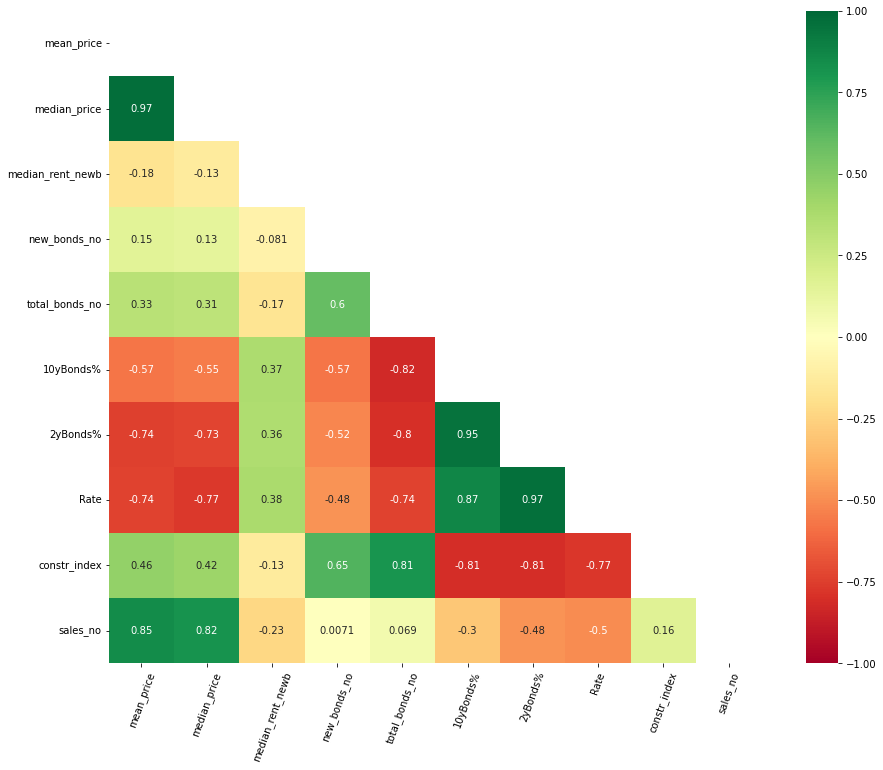

In [10]:
# show correlation matrix for numeric data
plt.figure(figsize=(16, 12))

postcode_corr = pivot_time[['mean_price', 'median_price', 'median_rent_newb', 'new_bonds_no', 'total_bonds_no', 
                            '10yBonds%', '2yBonds%', 'Rate', 'constr_index', 'sales_no']]

matrix = np.triu(postcode_corr.corr())

sns.heatmap(postcode_corr.corr(), 
            annot=True, # put coefficients in
            fmt='.2g', # set number of decimals
            vmin=-1, vmax=1, center=0, # rescale colorbar
            cmap='RdYlGn', # set color palette
            square=True, # set squares
            mask=matrix) # display only lower triangular matrix
plt.yticks(rotation=360)
plt.xticks(rotation=70);

Analysis of correlation with price:
- There is a weak negative relationship between the __rent level__ and the sales price level. This implies that periods with higher rent prices tend to have lower sales prices. However, as mentioned, the relationship is rather weak.
- There is a moderate positive relationship with the amount of __total bonds__.
- There is a moderate to strong negative relationship with __10 Year Bonds__. This makes sense since in economic theory investors can choose from different asset classes. Government bonds are considered as ultra safe and hence represent a baseline of what investors expect as return since they can have the bond yield "risk free". If bond yields rise, the relative return of competing asset classes decrease, demand goes down, and price level will follow.
- There is a strong negative relationship with __2 Year Bonds__. The reasoning is the same as for 10 year bonds. It is interesting, though, that the relationship for shorter duration bonds seems stronger.
- There is a moderate to strong positive relationship with __high income__. This implies that postcode area with high sales prices tend to have a population with higher income.
- There is a strong negative relationship with __interest rates__. This is another reasonable observation from an economic point of view. When interest rates decrease, it means capital becomes cheaper i.e. it is easier to get a loan since they are related to the rate level. Hence demand for housing, financed through loans, increases, and prices adjust accordingly.
- There is a moderate positive relationship with __construction costs__. This makes sense since house prices should increase as cost for building them increases.
- Lastly, there is a strong positive relationship with __sales numbers__. It is not sure at this stage how this actually relates, but the number of sales could be viewed as a proxy for demand which would drive prices.

Interesting features to analyse over time together with price:
- dwelling type (in first EDA notebook)
- sales number
- median rent
- new bonds
- bond yields
- construction costs
- interest rate

#### Dwelling Type

In [11]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(data=price_mean)
ax.set_title("Average price of houses sold by dwelling type")
ax.set_ylabel("avg. price (AUD 000s)")
ax.set_xlabel(None);

NameError: name 'price_mean' is not defined

<Figure size 720x504 with 0 Axes>

#### Sales Number

#### Median Rent

#### New Bonds

#### Construction Costs

#### Bond Yields

#### Interest Rates

### By Postcode

In [ ]:
# pivot unstacked df to get aggregate values by postcode
pivot_postcode = pd.pivot_table(master,
                                index="postcode")
pivot_postcode

In [ ]:
pivot_postcode.columns

In [ ]:
pivot_postcode = pivot_postcode[['mean_price', 'median_price', 'median_rent_newb', 'new_bonds_no', 'total_bonds_no', '0-4yo', '5-14yo', '15-24yo', '25-34yo', '35-54yo', '55-64yo', '65+yo', 'ATSI', 'CPRF_2', 'CPRF_3', 'CPRF_4','CPRF_5', 'CPRF_6+', 'CPRF_HHOLD_NO', 'CPRF_na', 'INCP_HIGH', 'INCP_LOW', 'INCP_MID', 'INCP_NEG_NIL', 'YARRP 1976-1995', 'YARRP 1996-2005', 'YARRP 2006-2016', 'YARRP <1975', 'citizen_AU', 'citizen_non_AU']]

In [ ]:
# show correlation
plt.figure(figsize=(20, 15))

matrix = np.triu(pivot_postcode.corr())

sns.heatmap(pivot_postcode.corr(), 
            annot=True, # put coefficients in
            fmt='.2g', # set number of decimals
            vmin=-1, vmax=1, center=0, # rescale colorbar
            cmap='RdYlGn', # set color palette
            square=True, # set squares
            mask=matrix) # display only lower triangular matrix
plt.yticks(rotation=360)
plt.xticks(rotation=70);

Analysis of correlation with price:
- There is a very strong positive relationship between the __rent level__ and the sales price level. This implies that postcodes that have high rent prices also tend to have high sales prices. It remains unknown, however, if there actually is a causal relationship.
- There is a positive relationship with the amount of __new bonds__. This would make intuitively sense if the number of new bonds is seen as a proxy for demand in an area. First and foremost, this should have an effect on rent levels, but since rent prices are heavily correlated with sales levels, it would make sense if there is some relation with this too.
- The number of people in a certain __age bracket__ seems to have a slight positive relationship with sales price for people aged between 25-54. Once could argue that this covers the typical working lifespan and hence people in this age bracket are expected to have more money which is reflected in sales prices.
- There is a moderately strong negative relationship with __ATSI__. This implies that prices levels are lower in postcode areas where more people identifying as aboriginal live.
- There is a moderate to strong positive relationship with __high income__. This implies that postcode area with high sales prices tend to have a population with higher income.
- There is a rather weak positive relationship with the __different years of arrival__ in Australia. At this point, however, it is hard to reason why there should be a relationship
- Lastly, there is rather weak positive relationship with __non Australian citizenship__. This implies that postcodes with higher sales prices are culturally more diverse with a larger proportion of non-Australian citizens.

In [ ]:
pivot_postcode.columns

#### Median Rent

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="median_rent_newb", data=pivot_postcode)
plt.title("Relationship of Median Rent and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Median Rent Price", fontsize=12);

In [ ]:

plt.figure(figsize=(10,7))
sns.scatterplot(x="median_price", y="median_rent_newb", data=pivot_postcode)
plt.title("Relationship of Median Rent and Median Price Level", fontsize=14)
plt.xlabel("Median Sales Price", fontsize=12)
plt.ylabel("Median Rent Price", fontsize=12);

Comparing the median sales prices with median rent prices makes intuitively more sense, and also seems to be a more linear relationship. However, for both plots, the relationship looks non-linear and a logarithmic transformation of the median rent level might make sense if we want to use it.

#### New Bonds

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="new_bonds_no", data=pivot_postcode)
plt.title("Relationship of Number of New Bonds and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of New Bonds", fontsize=12);

In [ ]:
pivot_postcode["mean_price"].corr(pivot_postcode["new_bonds_no"])

There is a positive relationship. However, the variance is very large. Transformation might help.

#### Age Brackets

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="25-34yo", data=pivot_postcode)
plt.title("Relationship of 25-34yo Population and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of People between 25-34 Years", fontsize=12);

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="35-54yo", data=pivot_postcode)
plt.title("Relationship of 35-54yo Population and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of People between 35-54 Years", fontsize=12);

#### ATSI

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="ATSI", data=pivot_postcode)
plt.title("Relationship of Aboriginal Heritage and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of People identifying as Aboriginal", fontsize=12);

This looks like a strongly non-linear relationship. Transformation might be required.

#### High Income

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="INCP_HIGH", data=pivot_postcode)
plt.title("Relationship of High Income and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("High Income", fontsize=12);

There seems to be a somewhat linear relationship with a large variance for larger values.

#### Year of Arrival

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="YARRP 1996-2005", data=pivot_postcode)
plt.title("Relationship of Year of Arrival from 1996-2005 and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of People in Year Bracket", fontsize=12);

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="YARRP 2006-2016", data=pivot_postcode)
plt.title("Relationship of Year of Arrival from 2006-2016 and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of People in Year Bracket", fontsize=12);

#### Non-AUS Citizen

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="mean_price", y="citizen_non_AU", data=pivot_postcode)
plt.title("Relationship of non-AUS Citizenship and Mean Price Level", fontsize=14)
plt.xlabel("Mean Sales Price", fontsize=12)
plt.ylabel("Number of non-AUS citizens", fontsize=12);

### On Postcode Level and over Time (maybe use melt?)

In [ ]:
pivot_multi = pd.pivot_table(master,
                             index=['postcode', "time_period"])
    pivot_multi.head(20)

# Modeling

In [ ]:
modelDF = pd.read_csv("Files/Cleaned/Postcode-based/Unstacked_Sales_Rent_5Quarters_Imputed_pcFeatures.csv",
                     index_col="postcode")
modelDF.head()

In [ ]:
# drop mean price
modelDF = modelDF.drop(["mean_price 2020 Q1", "mean_price 2020 Q2", "mean_price 2020 Q3",
                        "mean_price 2020 Q4", "mean_price 2021 Q1"],
                      axis=1)
modelDF

## Baseline Regression Model (Chris)
Create a first baseline model here.

## Cross Validation


## Feature Engineering
Improve baseline model with different combinations and/or transformation of variables.

## Improved Model
Test if baseline model can be improved by using more sophisticated algorithms.

# Clustering (Ken & Felix)

## Kmeans

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
modelDF = pd.read_csv("Files/Cleaned/Postcode-based/Unstacked_Sales_Rent_5Quarters_Imputed_pcFeatures.csv",
                     index_col="postcode")

In [14]:
modelDF.head()

,mean_price 2020 Q1,mean_price 2020 Q2,mean_price 2020 Q3,mean_price 2020 Q4,mean_price 2021 Q1,median_price 2020 Q1,median_price 2020 Q2,median_price 2020 Q3,median_price 2020 Q4,median_price 2021 Q1,...,Rate 2020 Q1,Rate 2020 Q2,Rate 2020 Q3,Rate 2020 Q4,Rate 2021 Q1,constr_index 2020 Q1,constr_index 2020 Q2,constr_index 2020 Q3,constr_index 2020 Q4,constr_index 2021 Q1
postcode,,,,,,,,,,,,,,,,,,,,,
2000,1541.0,1322.0,1631.0,1379.0,2794.0,1225.0,1000.0,1390.0,1110.0,1371.0,...,0.638889,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8
2007,834.0,739.0,658.0,677.0,754.0,745.0,775.0,655.0,651.0,763.0,...,0.638889,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8
2008,956.0,1144.0,985.0,1184.0,937.0,750.0,1173.0,890.0,991.0,855.0,...,0.638889,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8
2009,1277.0,1282.0,1373.0,1661.0,1427.0,986.0,1100.0,1085.0,1075.0,1188.0,...,0.638889,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8
2010,1357.0,1395.0,1476.0,2267.0,1371.0,1280.0,1325.0,1270.0,1240.0,1201.0,...,0.638889,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8


__Scaling the data__

In [15]:
# for retaining column and index names
columns = modelDF.columns
postcode = modelDF.index

# Initialise scaler
scaler = StandardScaler() 

# Transform
scaledDF = scaler.fit_transform(modelDF)

# Put into a dataframe
scaledDF = pd.DataFrame(scaledDF,index=postcode)
scaledDF.columns = columns
scaledDF

,mean_price 2020 Q1,mean_price 2020 Q2,mean_price 2020 Q3,mean_price 2020 Q4,mean_price 2021 Q1,median_price 2020 Q1,median_price 2020 Q2,median_price 2020 Q3,median_price 2020 Q4,median_price 2021 Q1,...,Rate 2020 Q1,Rate 2020 Q2,Rate 2020 Q3,Rate 2020 Q4,Rate 2021 Q1,constr_index 2020 Q1,constr_index 2020 Q2,constr_index 2020 Q3,constr_index 2020 Q4,constr_index 2021 Q1
postcode,,,,,,,,,,,,,,,,,,,,,
2000,1.528415,1.004298,1.318394,0.807824,3.090701,1.066866,0.489395,1.256337,0.567324,1.019112,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
2007,-0.028669,-0.256757,-0.388131,-0.411597,-0.319902,-0.129141,-0.071472,-0.338995,-0.388276,-0.204090,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
2008,0.240021,0.619276,0.185388,0.469096,-0.013951,-0.116683,0.920639,0.171077,0.319576,-0.019000,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
2009,0.946986,0.917776,0.865893,1.297677,0.805262,0.471354,0.738669,0.594328,0.494457,0.650944,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
2010,1.123177,1.162200,1.046542,2.350340,0.711638,1.203908,1.299536,0.995875,0.837973,0.677098,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,-0.312777,-0.287039,-0.272375,-0.314321,-0.309035,-0.228809,-0.196109,-0.189229,-0.217558,-0.209120,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
2877,-0.312777,-0.287039,-1.154576,-1.245389,-1.226053,-0.228809,-0.196109,-1.337434,-1.285581,-1.346818,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
2878,-0.312777,-0.287039,-0.272375,-0.314321,-0.309035,-0.228809,-0.196109,-0.189229,-0.217558,-0.209120,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0


__KMeans modeling__

In [16]:
distortions = []
K = range(1,11)
for i in K:
    km = KMeans(n_clusters = i)
    km.fit(scaledDF)
    distortions.append(km.inertia_)

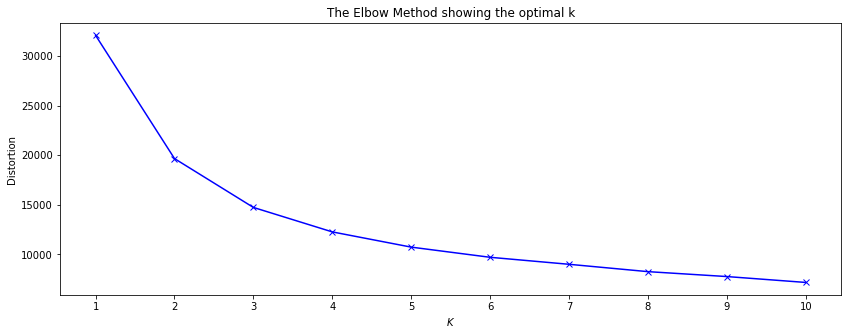

In [17]:
plt.figure(figsize=(14,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('$K$')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(K)
plt.show()

In [18]:
km = KMeans(n_clusters = 2)
km.fit(scaledDF)
km_label_2 = km.predict(scaledDF)
modelDF['label_2'] = km_label_2

In [19]:
modelDF.groupby('label_2').mean()

,mean_price 2020 Q1,mean_price 2020 Q2,mean_price 2020 Q3,mean_price 2020 Q4,mean_price 2021 Q1,median_price 2020 Q1,median_price 2020 Q2,median_price 2020 Q3,median_price 2020 Q4,median_price 2021 Q1,...,Rate 2020 Q1,Rate 2020 Q2,Rate 2020 Q3,Rate 2020 Q4,Rate 2021 Q1,constr_index 2020 Q1,constr_index 2020 Q2,constr_index 2020 Q3,constr_index 2020 Q4,constr_index 2021 Q1
label_2,,,,,,,,,,,,,,,,,,,,,
0,823.549774,828.153846,851.291855,886.545249,911.308824,784.590498,789.619910,799.576923,823.486425,852.507919,...,0.638889,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8
1,926.198473,957.396947,973.793893,1006.412214,1060.183206,838.122137,851.083969,850.335878,884.778626,904.717557,...,0.638889,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8


In [20]:
modelDF.label_2.value_counts()

0    442
1    131
Name: label_2, dtype: int64

Text(0.5, 1.0, '2020 Q1')

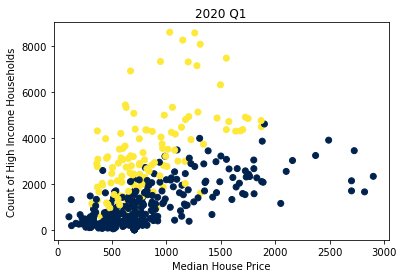

In [21]:
plt.scatter(x=modelDF['median_price 2020 Q1'], y=modelDF['INCP_HIGH'],c=modelDF['label_2'],cmap='cividis')
plt.xlabel('Median House Price')
plt.ylabel('Count of High Income Households')
plt.title('2020 Q1')

## Hierarchical clustering

In [22]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [23]:
modelDF = pd.read_csv("Files/Cleaned/Postcode-based/Unstacked_Sales_Rent_5Quarters_Imputed_pcFeatures.csv",
                     index_col="postcode")

In [24]:
# for retaining column and index names
columns = modelDF.columns
postcode = modelDF.index

# Initialise scaler
scaler = StandardScaler() 

# Transform
scaledDF = scaler.fit_transform(modelDF)

# Put into a dataframe
scaledDF = pd.DataFrame(scaledDF,index=postcode)
scaledDF.columns = columns
scaledDF.head()

,mean_price 2020 Q1,mean_price 2020 Q2,mean_price 2020 Q3,mean_price 2020 Q4,mean_price 2021 Q1,median_price 2020 Q1,median_price 2020 Q2,median_price 2020 Q3,median_price 2020 Q4,median_price 2021 Q1,...,Rate 2020 Q1,Rate 2020 Q2,Rate 2020 Q3,Rate 2020 Q4,Rate 2021 Q1,constr_index 2020 Q1,constr_index 2020 Q2,constr_index 2020 Q3,constr_index 2020 Q4,constr_index 2021 Q1
postcode,,,,,,,,,,,,,,,,,,,,,
2000,1.528415,1.004298,1.318394,0.807824,3.090701,1.066866,0.489395,1.256337,0.567324,1.019112,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
2007,-0.028669,-0.256757,-0.388131,-0.411597,-0.319902,-0.129141,-0.071472,-0.338995,-0.388276,-0.204090,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
2008,0.240021,0.619276,0.185388,0.469096,-0.013951,-0.116683,0.920639,0.171077,0.319576,-0.019000,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
2009,0.946986,0.917776,0.865893,1.297677,0.805262,0.471354,0.738669,0.594328,0.494457,0.650944,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0
2010,1.123177,1.162200,1.046542,2.350340,0.711638,1.203908,1.299536,0.995875,0.837973,0.677098,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0


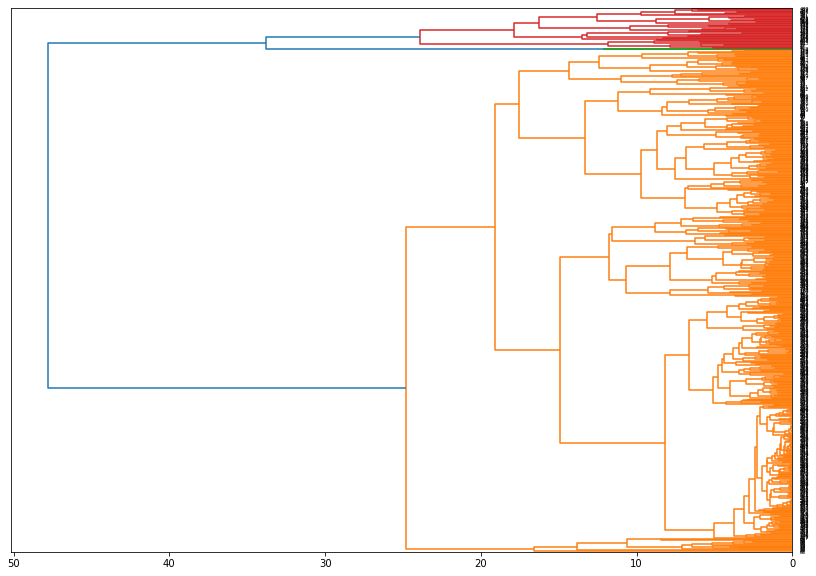

In [25]:
# Complete linkage
plt.figure(figsize=(14,10))
mergings = linkage(scaledDF, method="complete", metric='euclidean')
dendrogram(mergings, orientation='left')
plt.show()

In [26]:
labels = cut_tree(mergings,n_clusters=2)
modelDF['labels'] = labels
modelDF

,mean_price 2020 Q1,mean_price 2020 Q2,mean_price 2020 Q3,mean_price 2020 Q4,mean_price 2021 Q1,median_price 2020 Q1,median_price 2020 Q2,median_price 2020 Q3,median_price 2020 Q4,median_price 2021 Q1,...,Rate 2020 Q2,Rate 2020 Q3,Rate 2020 Q4,Rate 2021 Q1,constr_index 2020 Q1,constr_index 2020 Q2,constr_index 2020 Q3,constr_index 2020 Q4,constr_index 2021 Q1,labels
postcode,,,,,,,,,,,,,,,,,,,,,
2000,1541.0,1322.0,1631.0,1379.0,2794.0,1225.0,1000.0,1390.0,1110.0,1371.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,0
2007,834.0,739.0,658.0,677.0,754.0,745.0,775.0,655.0,651.0,763.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,1
2008,956.0,1144.0,985.0,1184.0,937.0,750.0,1173.0,890.0,991.0,855.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,1
2009,1277.0,1282.0,1373.0,1661.0,1427.0,986.0,1100.0,1085.0,1075.0,1188.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,1
2010,1357.0,1395.0,1476.0,2267.0,1371.0,1280.0,1325.0,1270.0,1240.0,1201.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,705.0,725.0,724.0,733.0,760.5,705.0,725.0,724.0,733.0,760.5,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,1
2877,705.0,725.0,221.0,197.0,212.0,705.0,725.0,195.0,220.0,195.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,1
2878,705.0,725.0,724.0,733.0,760.5,705.0,725.0,724.0,733.0,760.5,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,1


Text(0.5, 1.0, '2020 Q1')

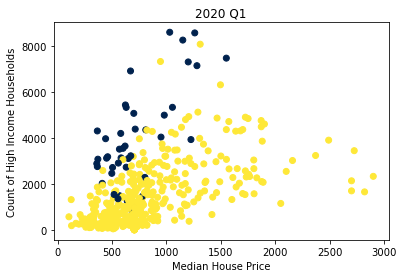

In [27]:
plt.scatter(x=modelDF['median_price 2020 Q1'], y=modelDF['INCP_HIGH'],c=modelDF['labels'],cmap='cividis')
plt.xlabel('Median House Price')
plt.ylabel('Count of High Income Households')
plt.title('2020 Q1')

# Distinct Models per Clusters


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

In [29]:
modelDF = pd.read_csv("Files/Cleaned/Postcode-based/Unstacked_Sales_Rent_5Quarters_Imputed_pcFeatures.csv",
                     index_col="postcode")

In [30]:
modelDF['labels'] = km_label_2
modelDF

,mean_price 2020 Q1,mean_price 2020 Q2,mean_price 2020 Q3,mean_price 2020 Q4,mean_price 2021 Q1,median_price 2020 Q1,median_price 2020 Q2,median_price 2020 Q3,median_price 2020 Q4,median_price 2021 Q1,...,Rate 2020 Q2,Rate 2020 Q3,Rate 2020 Q4,Rate 2021 Q1,constr_index 2020 Q1,constr_index 2020 Q2,constr_index 2020 Q3,constr_index 2020 Q4,constr_index 2021 Q1,labels
postcode,,,,,,,,,,,,,,,,,,,,,
2000,1541.0,1322.0,1631.0,1379.0,2794.0,1225.0,1000.0,1390.0,1110.0,1371.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,1
2007,834.0,739.0,658.0,677.0,754.0,745.0,775.0,655.0,651.0,763.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,0
2008,956.0,1144.0,985.0,1184.0,937.0,750.0,1173.0,890.0,991.0,855.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,1
2009,1277.0,1282.0,1373.0,1661.0,1427.0,986.0,1100.0,1085.0,1075.0,1188.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,0
2010,1357.0,1395.0,1476.0,2267.0,1371.0,1280.0,1325.0,1270.0,1240.0,1201.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,705.0,725.0,724.0,733.0,760.5,705.0,725.0,724.0,733.0,760.5,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,0
2877,705.0,725.0,221.0,197.0,212.0,705.0,725.0,195.0,220.0,195.0,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,0
2878,705.0,725.0,724.0,733.0,760.5,705.0,725.0,724.0,733.0,760.5,...,0.25,0.25,0.15625,0.1,116.0,116.2,116.2,116.9,117.8,0


__Sub-setting clusters__

In [31]:
cluster0 = modelDF.loc[modelDF['labels']==0]
cluster1 = modelDF.loc[modelDF['labels']==1]

cluster0 = cluster0.drop('labels',axis=1)
cluster1 = cluster1.drop('labels',axis=1)

__Model on 1st Cluster__

In [32]:
lr = LinearRegression()
score = cross_val_score(lr, cluster0.drop(['median_price 2021 Q1'],axis=1), # X
                        cluster0['median_price 2021 Q1'],                   # y 
                        cv=KFold(n_splits=10, shuffle=True)) 
score

array([0.96198674, 0.97100116, 0.92653006, 0.98132627, 0.9286788 ,
       0.96517866, 0.93812225, 0.78336095, 0.95149263, 0.93184602])

__Model on 2nd Cluster__

In [33]:
lr = LinearRegression()
score = cross_val_score(lr, cluster1.drop(['median_price 2021 Q1'],axis=1), # X
                        cluster1['median_price 2021 Q1'],                   # y 
                        cv=KFold(n_splits=10, shuffle=True)) 
score

array([ 0.79673612,  0.89979577,  0.89296492,  0.8781106 ,  0.65894688,
       -0.43533715,  0.07605507,  0.65637115,  0.85069056,  0.96641482])

# Results


# Conclusion and Outlook
Summarise findings and elaborate on implications and scope of model with regards to data sufficiency.